In [252]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [11]:
wards = pd.read_pickle("Datasets/ward.p")
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [13]:
census = pd.read_pickle("Datasets/census.p")
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [17]:
joined = wards.merge(census, how="inner", on="ward", suffixes=('_ward','_cens'))

joined.head()

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cens,zip_cens
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [19]:
joined.shape

(50, 9)

In [21]:
lisc = pd.read_pickle("Datasets/licenses.p")
lisc.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [23]:
ward_lisc = wards.merge(lisc, on="ward",suffixes=('_ward','_lisc'))
ward_lisc.head()

,ward,alderman,address_ward,zip_ward,account,aid,business,address_lisc,zip_lisc
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [25]:
ward_lisc.shape

(10000, 9)

In [34]:
zip = pd.read_pickle("Datasets/zip_demo.p")
zip.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [42]:
lisc_zip = zip.merge(lisc, on="zip")
lisc_zip.head()

,zip,income,account,ward,aid,business,address
0,60630,70122,10548,39,NaN,CORPORATE CLAIMS SYSTEMS INC,5247 N ELSTON AVE
1,60630,70122,11390,35,NaN,McGILL'S BAR & GRILL,4551-4553 N PULASKI RD GROUND
2,60630,70122,122,45,785,ZIEMEK CORP.,5368 N MILWAUKEE AVE
3,60630,70122,14,39,763,KILDARE LIQUORS,4300 W LAWRENCE AVE
4,60630,70122,14572,45,775,SICILIA BAKERY,5939 W LAWRENCE AVE


In [46]:
lisc_zip.loc[lisc_zip['business'] == "REGGIE'S BAR & GRILL", ['zip','income','business','address']]

,zip,income,business,address
6344,60616,46340,REGGIE'S BAR & GRILL,2105 S STATE ST


In [48]:
lisc.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [50]:
zip.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [52]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [78]:
wards_zip = wards.merge(zip, on="zip").head()

wards_zip.head()

,ward,alderman,address,zip,income
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,68223
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,87143
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,33959
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,46340
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,24941


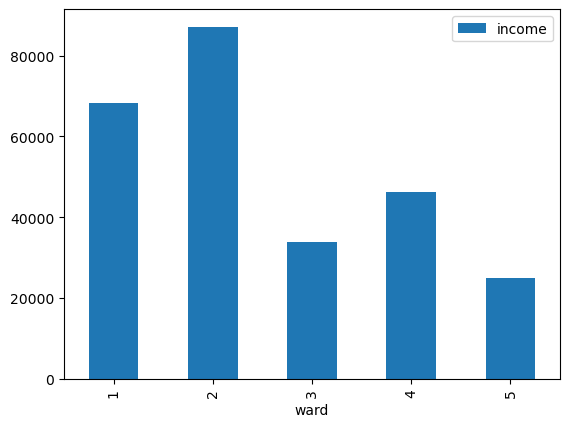

In [88]:
wards_zip.groupby("ward").agg({'income':'sum'}).plot(kind="bar")
plt.show()

In [90]:
movies = pd.read_pickle("Datasets/movies.p")
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [92]:
tags = pd.read_pickle("Datasets/taglines.p")
tags.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [98]:
#left join
movies_tag = movies.merge(tags,how="left",on="id")
movies_tag.head()

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


In [100]:
movies_tag.shape

(4803, 5)

In [104]:
m_to_g = pd.read_pickle("Datasets/movie_to_genres.p")
m_to_g.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [112]:
#right join
genre_tv_movie = m_to_g[m_to_g["genre"]=='TV Movie']

In [120]:
movie_tv_merge = movies.merge(genre_tv_movie, how="right", left_on="id", right_on="movie_id")
movie_tv_merge.head()

,id,title,popularity,release_date,movie_id,genre
0,10947,High School Musical,16.536374,2006-01-20,10947,TV Movie
1,13187,A Charlie Brown Christmas,8.701183,1965-12-09,13187,TV Movie
2,22488,Love's Abiding Joy,1.128559,2006-10-06,22488,TV Movie
3,78814,We Have Your Husband,0.102003,2011-11-12,78814,TV Movie
4,153397,Restless,0.812776,2012-12-07,153397,TV Movie


In [122]:
genre_comedy = m_to_g[m_to_g['genre']=='Comedy']
genre_comedy.head()

,movie_id,genre
1,5,Comedy
7,13,Comedy
35,35,Comedy
54,68,Comedy
61,71,Comedy


In [134]:
genre_fam = m_to_g[m_to_g['genre']=='Family']
genre_fam.head()

,movie_id,genre
5,12,Family
33,35,Family
111,105,Family
139,118,Family
156,129,Family


In [140]:
genre_comedy.merge(genre_fam,how="outer",on="movie_id",suffixes=('_com','_fam')).head()

,movie_id,genre_com,genre_fam
0,5,Comedy,NaN
1,12,NaN,Family
2,13,Comedy,NaN
3,35,Comedy,Family
4,68,Comedy,NaN


In [142]:
sequels = pd.read_pickle("Datasets/sequels.p")
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [152]:
#self join
sequels.merge(sequels,left_on="sequel", right_on="id", suffixes=('_org','_seq'))[['title_org','title_seq']].head()

,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers


In [154]:
## merging on index
movie1 = movies.set_index('id')
movie1.head()

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17


In [156]:
tag1 = tags.set_index("id")
tag1.head()

,tagline
id,
19995,Enter the World of Pandora.
285,"At the end of the world, the adventure begins."
206647,A Plan No One Escapes
49026,The Legend Ends
49529,"Lost in our world, found in another."


In [158]:
movie1.merge(tag1,on="id")

,title,popularity,release_date,tagline
id,,,,
14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure
49529,John Carter,43.926995,2012-03-07,"Lost in our world, found in another."
...,...,...,...,...
12281,Mean Creek,8.519202,2004-01-15,"Beneath the surface, everyone has a secret."
3089,Red River,5.344815,1948-08-26,Big as the men who faced this challenge! Bold ...
11934,The Hudsucker Proxy,14.188982,1994-03-11,They took him for a fall guy... but he threw t...


In [160]:
## multi-index

In [194]:
casts = pd.read_pickle("Datasets/casts.p")

samuel = casts[casts["name"].str.contains("Samuel L. Jackson")]

samuel_multi_index = samuel.set_index(["movie_id","cast_id"])

samuel_multi_index.head()

,,character,gender,id,name
movie_id,cast_id,,,,
184,3,Ordell Robbie,2,2231,Samuel L. Jackson
319,13,Big Don,2,2231,Samuel L. Jackson
326,2,Neville Flynn,2,2231,Samuel L. Jackson
329,138,Arnold,2,2231,Samuel L. Jackson
393,21,Rufus,2,2231,Samuel L. Jackson


In [202]:
casts= pd.read_pickle("Datasets/casts.p")
casts_multi_index = casts.set_index(["movie_id","cast_id"])

casts_multi_index.head()

character  gender    id               name
movie_id cast_id                                           
5        22        Jezebel       1  3122        Sammi Davis
         23          Diana       1  3123  Amanda de Cadenet
         24         Athena       1  3124     Valeria Golino
         25        Elspeth       1  3125            Madonna
         26            Eva       1  3126          Ione Skye

In [212]:
samuel_multi_index.merge(casts_multi_index,
                         on=["movie_id","cast_id"],suffixes=('_samuel','_cast'))\
                        [['name_samuel','character_samuel']].head()

,,name_samuel,character_samuel
movie_id,cast_id,,
184,3,Samuel L. Jackson,Ordell Robbie
319,13,Samuel L. Jackson,Big Don
326,2,Samuel L. Jackson,Neville Flynn
329,138,Samuel L. Jackson,Arnold
393,21,Samuel L. Jackson,Rufus


In [218]:
movies_index = movies.set_index('id')
movies_index.head()

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17


In [224]:
m_to_g_index = m_to_g.set_index('movie_id')
m_to_g_index.head()

,genre
movie_id,
5,Crime
5,Comedy
11,Science Fiction
11,Action
11,Adventure


In [234]:
movies_index.merge(m_to_g_index, left_index=True, right_index=True)

,title,popularity,release_date,genre
id,,,,
257,Oliver Twist,20.415572,2005-09-23,Crime
257,Oliver Twist,20.415572,2005-09-23,Drama
257,Oliver Twist,20.415572,2005-09-23,Family
14290,Better Luck Tomorrow,3.877036,2002-01-12,Crime
14290,Better Luck Tomorrow,3.877036,2002-01-12,Drama
...,...,...,...,...
13807,Exiled,8.486390,2006-09-06,Crime
13807,Exiled,8.486390,2006-09-06,Action
73873,Albert Nobbs,7.802245,2011-12-21,Drama


In [438]:
engine = create_engine("sqlite:///chinook.db")
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", engine)
print(tables)

               name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


In [379]:
genre_df = pd.read_sql("SELECT * FROM genres",engine)
genre_df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [422]:
track_df = pd.read_sql("SELECT * FROM tracks WHERE GenreId < 10",engine)
track_df.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [424]:
#semi join -> combines observations from both tables if there are matching values in both tables (mutation)
genres_tracks = genre_df.merge(track_df,how="inner",on="GenreId")

In [426]:
genre_df[genre_df["GenreId"].isin(genres_tracks["GenreId"])].head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [428]:
len(genre_df), len(track_df)

(25, 2911)

In [436]:
#anti-join -> filters records on one table based on whether or not the matching value is present in other table (filtering)
genre_track_ind= genre_df.merge(track_df, on="GenreId", how="left",indicator=True)
gid_list = genre_track_ind.loc[genre_track_ind['_merge'] == 'left_only', 'GenreId']

genre_df[genre_df['GenreId'].isin(gid_list)].head()

,GenreId,Name
9,10,Soundtrack
10,11,Bossa Nova
11,12,Easy Listening
12,13,Heavy Metal
13,14,R&B/Soul


In [478]:
inv_jan = pd.read_sql('SELECT * FROM invoices WHERE InvoiceDate < "2009-02-01" ', engine)
inv_feb = pd.read_sql('SELECT * FROM invoices WHERE InvoiceDate < "2009-03-01" AND InvoiceDate >= "2009-02-01"', engine)
inv_mar = pd.read_sql('SELECT * FROM invoices WHERE InvoiceDate < "2009-04-01" AND InvoiceDate >= "2009-03-01"', engine)


concat_df = pd.concat([inv_jan, inv_feb, inv_mar],axis=0, ignore_index=True, keys=['Jan','Feb','Mar']) 
#cant use ignore index and keys together

concat_df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [480]:
inv_jan = pd.read_sql('SELECT InvoiceId,CustomerId,InvoiceDate,Total  FROM invoices WHERE InvoiceDate < "2009-02-01" ', engine)
inv_feb = pd.read_sql('SELECT InvoiceId,CustomerId,InvoiceDate,BillingCountry,Total FROM invoices WHERE InvoiceDate < "2009-03-01" AND InvoiceDate >= "2009-02-01"', engine)

In [490]:
pd.concat([inv_jan, inv_feb])

,InvoiceId,CustomerId,InvoiceDate,Total,BillingCountry
0,1,2,2009-01-01 00:00:00,1.98,NaN
1,2,4,2009-01-02 00:00:00,3.96,NaN
2,3,8,2009-01-03 00:00:00,5.94,NaN
3,4,14,2009-01-06 00:00:00,8.91,NaN
4,5,23,2009-01-11 00:00:00,13.86,NaN
5,6,37,2009-01-19 00:00:00,0.99,NaN
0,7,38,2009-02-01 00:00:00,1.98,Germany
1,8,40,2009-02-01 00:00:00,1.98,France
2,9,42,2009-02-02 00:00:00,3.96,France
3,10,46,2009-02-03 00:00:00,5.94,Ireland


In [492]:
pd.concat([inv_jan, inv_feb],sort=True)

,BillingCountry,CustomerId,InvoiceDate,InvoiceId,Total
0,NaN,2,2009-01-01 00:00:00,1,1.98
1,NaN,4,2009-01-02 00:00:00,2,3.96
2,NaN,8,2009-01-03 00:00:00,3,5.94
3,NaN,14,2009-01-06 00:00:00,4,8.91
4,NaN,23,2009-01-11 00:00:00,5,13.86
5,NaN,37,2009-01-19 00:00:00,6,0.99
0,Germany,38,2009-02-01 00:00:00,7,1.98
1,France,40,2009-02-01 00:00:00,8,1.98
2,France,42,2009-02-02 00:00:00,9,3.96
3,Ireland,46,2009-02-03 00:00:00,10,5.94


In [494]:
pd.concat([inv_jan, inv_feb],join="inner")

,InvoiceId,CustomerId,InvoiceDate,Total
0,1,2,2009-01-01 00:00:00,1.98
1,2,4,2009-01-02 00:00:00,3.96
2,3,8,2009-01-03 00:00:00,5.94
3,4,14,2009-01-06 00:00:00,8.91
4,5,23,2009-01-11 00:00:00,13.86
5,6,37,2009-01-19 00:00:00,0.99
0,7,38,2009-02-01 00:00:00,1.98
1,8,40,2009-02-01 00:00:00,1.98
2,9,42,2009-02-02 00:00:00,3.96
3,10,46,2009-02-03 00:00:00,5.94


In [500]:
stock = pd.read_csv("Datasets/S&P500.csv")
stock

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


In [524]:
appl = pd.read_csv("Datasets/AAPL.csv")[['Date','Close']]
mcd = pd.read_csv("Datasets/MCD.csv")[['Date','Close']]

appl_mcd = pd.merge_ordered(appl,mcd, on="Date", suffixes=('_appl','_mcd'),fill_method='ffill')

In [526]:
appl_mcd

,Date,Close_appl,Close_mcd
0,1966-07-05,NaN,0.269547
1,1966-07-06,NaN,0.283951
2,1966-07-07,NaN,0.273663
3,1966-07-08,NaN,0.276749
4,1966-07-11,NaN,0.275720
...,...,...,...
13523,2020-03-26,258.440002,167.350006
13524,2020-03-27,247.740005,164.009995
13525,2020-03-30,254.809998,168.130005
13526,2020-03-31,254.289993,165.350006


In [546]:
ibm = pd.read_csv("Datasets/IBM.csv",parse_dates=["Date"])[['Date','Close']]
ibm = ibm[ibm['Date'] >= '2008-03-19']

visa = pd.read_csv("Datasets/visa.csv",parse_dates=["Date"])[['Date','Close']]

ibm_visa = pd.merge_asof(ibm, visa, on="Date", suffixes=('_ibm','_visa'))
ibm_visa.head()

,Date,Close_ibm,Close_visa
0,2008-03-19,116.940002,14.1250
1,2008-03-20,118.330002,16.0875
2,2008-03-24,119.059998,14.9325
3,2008-03-25,117.970001,15.8125
4,2008-03-26,116.910004,15.9900


In [566]:
ibm.query('Close > 215').head()

,Date,Close
12887,2013-03-14,215.800003
12891,2013-03-20,215.059998


In [570]:
gdp = pd.read_csv("Datasets/WorldBank_GDP.csv")
gdp.head()

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [580]:
#wide to long

In [576]:
soc_fin = pd.read_csv("Datasets/Social_Financial_Data.csv")
soc_fin.head()

,financial,company,2019,2018,2017,2016
0,total_revenue,twitter,3459329,3042359,2443299,2529619
1,gross_profit,twitter,2322288,2077362,1582057,1597379
2,net_income,twitter,1465659,1205596,-108063,-456873
3,total_revenue,facebook,70697000,55838000,40653000,27638000
4,gross_profit,facebook,57927000,46483000,35199000,23849000


In [586]:
long = soc_fin.melt(id_vars=["financial","company"])
long.head()

,financial,company,variable,value
0,total_revenue,twitter,2019,3459329
1,gross_profit,twitter,2019,2322288
2,net_income,twitter,2019,1465659
3,total_revenue,facebook,2019,70697000
4,gross_profit,facebook,2019,57927000


In [594]:
long1 = social_fin.melt(id_vars=["financial","company"],value_vars=['2019','2018'])
long1.head()

,financial,company,variable,value
0,total_revenue,twitter,2019,3459329
1,gross_profit,twitter,2019,2322288
2,net_income,twitter,2019,1465659
3,total_revenue,facebook,2019,70697000
4,gross_profit,facebook,2019,57927000


In [598]:
long2 = soc_fin.melt(id_vars=["financial", "company"], var_name="year", value_name="dollars")
long2.head()

,financial,company,year,dollars
0,total_revenue,twitter,2019,3459329
1,gross_profit,twitter,2019,2322288
2,net_income,twitter,2019,1465659
3,total_revenue,facebook,2019,70697000
4,gross_profit,facebook,2019,57927000
